# Best Neighborhood for Paw Patrol Headquarters
## Seamus McGroary - Neighborhood With Most Parks

We are dealing with some pretty powerful dogs here, they do a lot for the community, and they deserve a place where they can relax, chase some squirrels, and play a game of catch. These reasons led us to choose our next metric in determining the best neighborhood for a Paw Patrol Headquarters, which is the neighborhood with the most parks!


![PawPatrol](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExb3ZmbHV0eHVlbTZ5aWljcWxjM3JubTY1eDN5YTlyZnU3dXN0enRlOCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/p3oPGBzHUkDsjByy7x/giphy.gif)

Let's start by importing all of the things that we are going to need to properly determine which neighborhood has the most parks.

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
%matplotlib inline

Now lets take a look at the data set we are going to be working with.

In [6]:
data = pd.read_csv("Park_file.csv")
data.head(20)

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
5,6,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
6,7,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
7,8,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
8,9,2049886968,Amber Triangle,Traffic Island/Median,2nd Division,NaN,East Liberty,7,8,42003111500,2,8,5,3-23,40.459099,-79.931846
9,10,1047118140,Ammon Park,Park,Parks - Schenley,NaN,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449526,-79.978247


While looking through this data set one thing became very apparent. Not all of these places listed are parks, so what I must do is go through and filter out those places that are not considered parks because we want our dogs to have the best places to let off some steam.

In [7]:
drop_points = [] # create a list for later when we need indices of where to drop certain rows

for index, row in data.iterrows(): # itterate through each row in the data set
    if "Park" not in row['type']: 
        drop_points.append(index) # if the string "Park" is not included in the row named 'type' add the index of where that row is to our list we created earlier
        
data.drop(drop_points, inplace=True) # now go and drop the rows in 'type' where "Parks" is not included
data[['name','type','neighborhood']].head(10) # lets take a look at our updated, filtered, data set

,name,type,neighborhood
0,Able Long Park,Park,Beechview
1,Albert Turk Graham Park,Park,Crawford-Roberts
2,Alcoa Park,Park,North Shore
3,Allegheny Commons,Park,Allegheny Center
4,Allegheny Landing Park,Park,North Shore
5,Allegheny Riverfront Park,Park,Central Business District
6,Alpine Gardens Park,Park,Central Northside
7,Alton Park,Park,Beechview
9,Ammon Park,Park,Bedford Dwellings
10,Arlington Park,Park,South Side Slopes


Let us now take a look at this data in the form of a graph to make it a little easier to see our front runners.

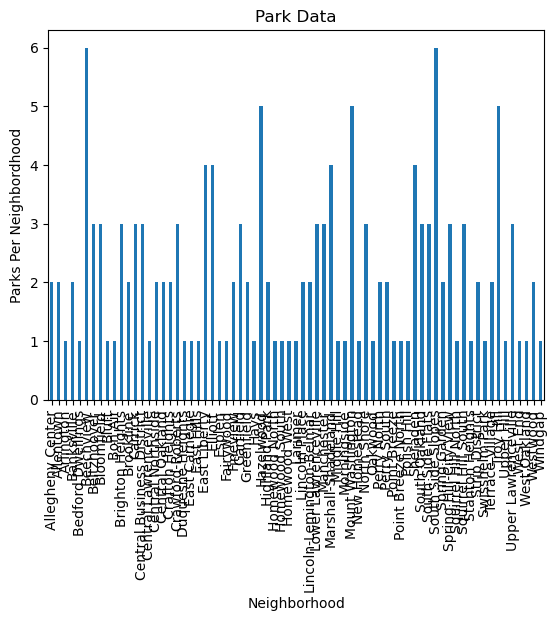

In [8]:
data["neighborhood"].value_counts().sort_index().plot(kind='bar', rot=90) 
plt.title("Park Data")
plt.xlabel("Neighborhood")
plt.ylabel("Parks Per Neighbordhood")
plt.show()

Well that that doesn't really make it easier to see who oyr front runners are, but it is clear from the graph that there are neighborhoods at the top and at the bottom of the leaderboard, so lets just look at the top ten.

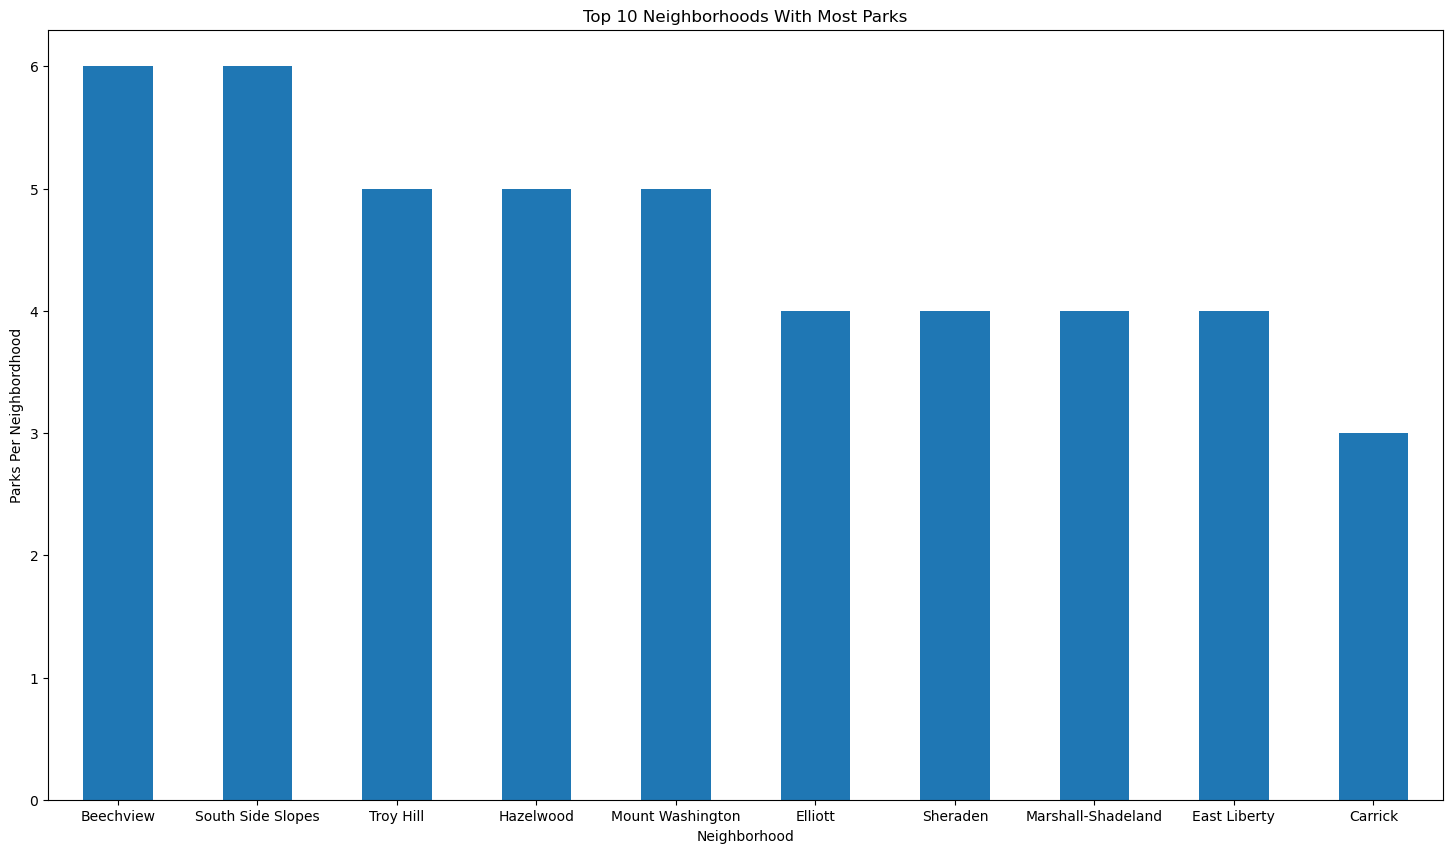

In [9]:
plt.figure(figsize=(18,10)) # adjust the size of our figures
data["neighborhood"].value_counts().sort_values(ascending = False).head(10).plot(kind='bar', rot=0) # looks at the top 10 neighborhoods
plt.title("Top 10 Neighborhoods With Most Parks")
plt.xlabel("Neighborhood")
plt.ylabel("Parks Per Neighbordhood")
plt.show()

Now that we have a good idea of which neighborhood is best, I think it is best to have a picture of where about our winner is in Pittsburgh, so lets put our data onto the map of Pittsburgh. We first must start by getting a map of the city.

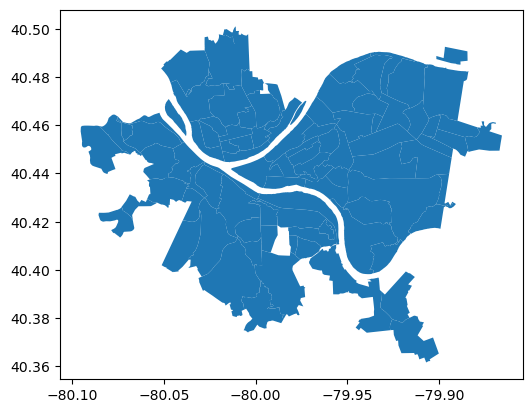

In [10]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()
plt.show()

Now that we have the shape opened up for our city, we have to fill in the map with the data we have collected.

In [11]:
pd.set_option('display.max_rows', None)

parks_count = data.groupby('neighborhood').size().reset_index(name = 'number_of_parks') # groups the amount of parks into an index called nummber_of_parks
parks_map = neighborhoods.merge(parks_count, how='left', left_on='hood', right_on='neighborhood') # merges the shape file and my data into one data set
parks_map[['hood','number_of_parks','geometry']]

,hood,number_of_parks,geometry
0,Central Oakland,2.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,2.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
5,Central Business District,3.0,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
6,Spring Hill-City View,3.0,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
7,Perry South,2.0,"POLYGON ((-80.01456 40.47727, -80.01462 40.477..."
8,Summer Hill,NaN,"POLYGON ((-80.01087 40.50097, -80.01073 40.499..."
9,Northview Heights,NaN,"POLYGON ((-80.00327 40.48271, -80.00326 40.482..."


Now lets see what this merge looks like on the map of Pittsburgh!!

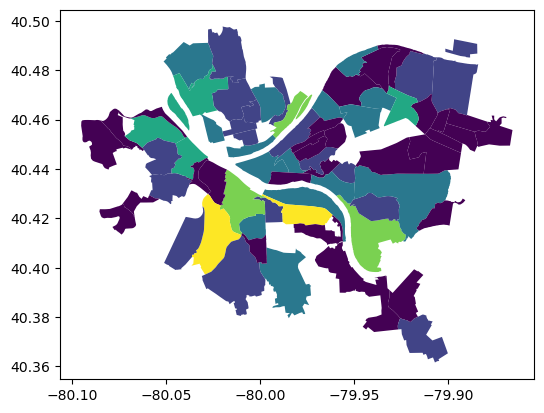

In [12]:
parks_map.plot(column='number_of_parks')
plt.show()

This does a poor job of showing where the most parks are in Pittsburgh so what we need to do is add some color to our map and also a key to show which neighborhood actually has the most amount of parks.

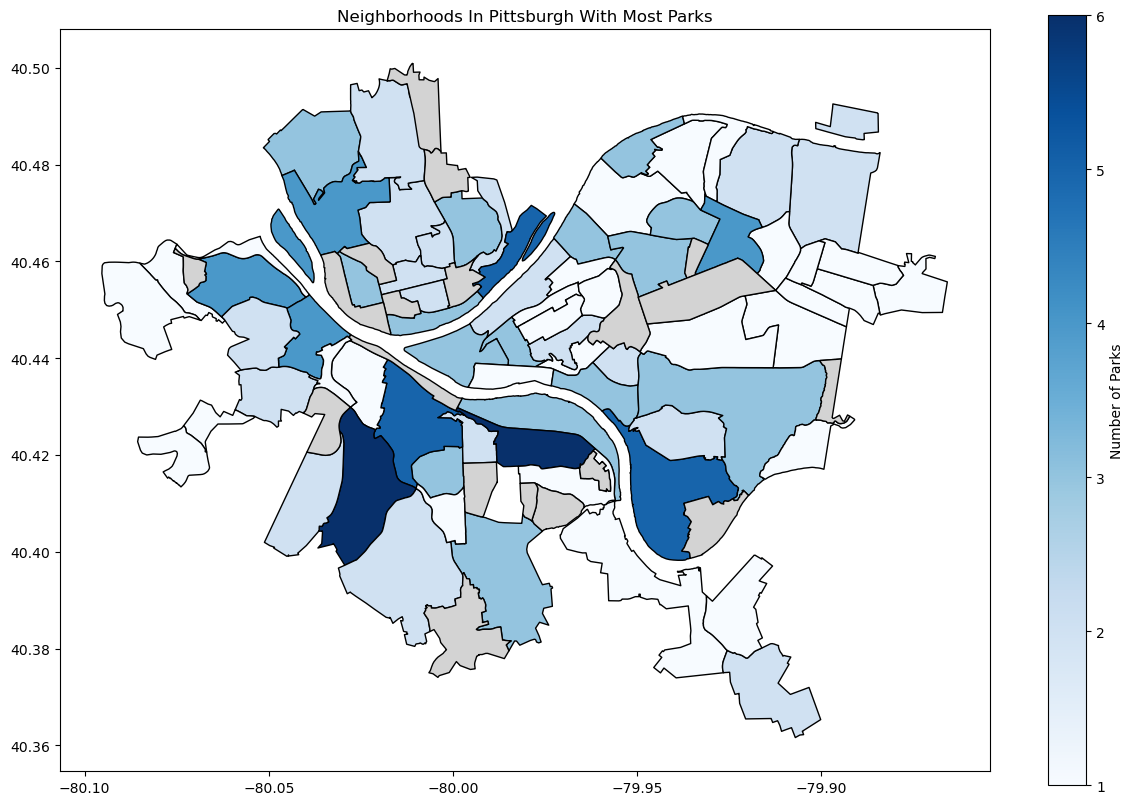

In [13]:
parks_map.plot(column='number_of_parks',cmap='Blues',edgecolor="black",
               legend=True,legend_kwds={'label': "Number of Parks"},figsize=(15, 10),missing_kwds={"color": "lightgrey"})
plt.title("Neighborhoods In Pittsburgh With Most Parks")
plt.show()


## Final Rankings
- There is a 2-Way tie for 1st place between Beechview and South Side Slopes


![PawPatrol Celebration](https://media.giphy.com/media/tyomFRLicdpSM/giphy.gif?cid=ecf05e47cut85pgjwua2f6ycmcrwnnb1wqh2bkgwaacj3bwi&ep=v1_gifs_search&rid=giphy.gif&ct=g)   